In [1]:
from functions.mapGenerator import *
from functions.graphLayout import *
from functions.imageTreatment import *
from functions.dependenciesGenerator import *
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import random

In [2]:
x = mapDependenciesGenerator(10, 2)
x.generateDependencies()
graph = GraphLayout(x.getDependencies())
graph.addSpecialPoints(num_points=0)
graph.forceDirectedLayout(iterations=10000)
layout = graph.getPositions()
layout_props = graph.getSpecialPositions()

In [3]:
margin_factor = 0.2
map = mapGenerator(graph.getGraph(), layout, margin_factor)
x_coords, y_coords, x_range, y_range, x_grid, y_grid, node_positions = map.getCoordinates()
density_with_noise, contour_levels = map.islandContour()

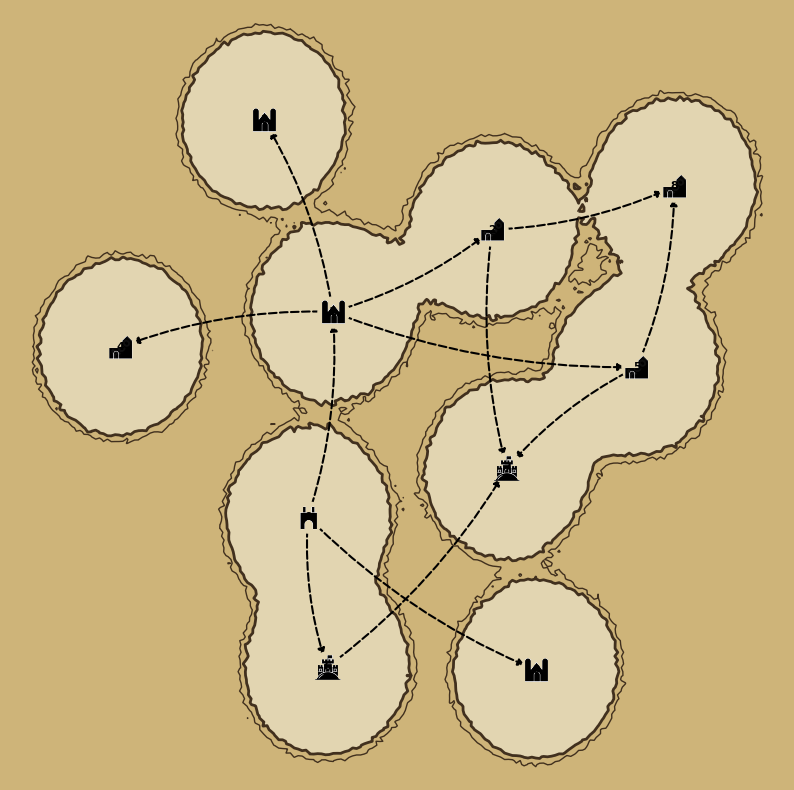

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#ceb479')

ax.contourf(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1], contour_levels[10]],
    colors=["#e2d5b1"], 
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1]],
    colors="#41301e",
    linewidths=2
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1] * 0.7],
    colors="#41301e",
    linewidths=1
)

edges = nx.draw_networkx_edges(
    graph.getGraph(),
    layout,
    ax=ax,
    edge_color='black',
    width=1.5,
    style="dashed",
    connectionstyle="arc3,rad=0.1"
)

for edge in edges:
    edge.set_zorder(4)

nodes = nx.draw_networkx_nodes(
    graph.getGraph(),
    layout,
    ax=ax,
    node_color='#e2d5b1',
    node_size=500
)

nodes.set_zorder(5)

for node, (x, y) in layout.items():
    img_path = random.choice([
        {'path': 'images/treasure_map/constructions/house1.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house2.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house3.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house4.png', 'zoom': 0.16},
        {'path': 'images/treasure_map/constructions/house5.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house6.png', 'zoom': 0.13},
    ])
    
    processed_img = remove_white_pixels(img_path['path'])
    imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])

    ab = AnnotationBbox(
        imagebox, (x, y),
        frameon=False,
        xycoords='data',
        xybox=(0, 0),
        boxcoords="offset points"
    )
    ab.set_zorder(6)
    ax.add_artist(ab)

labels = nx.draw_networkx_labels(
    graph.getGraph(),
    layout,
    ax=ax,
    font_size=8,
    font_weight='bold',
    font_color="black"
)

for label in labels.values():
    label.set_zorder(6)

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)
ax.axis('off')

plt.show()

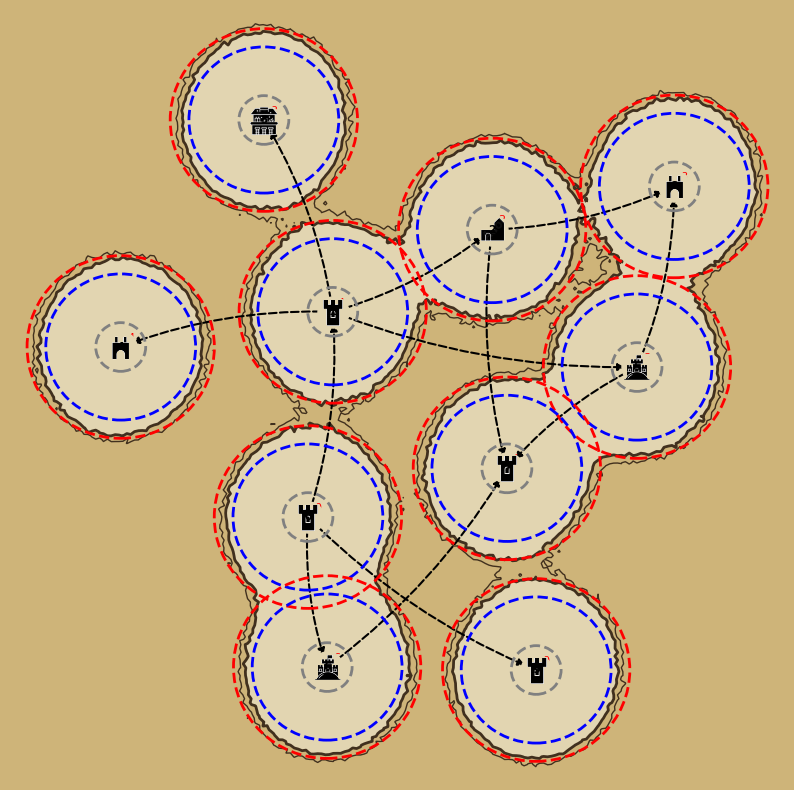

In [5]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#ceb479')

ax.contourf(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1], contour_levels[10]],
    colors=["#e2d5b1"], 
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1]],
    colors="#41301e",
    linewidths=2
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1] * 0.7],
    colors="#41301e",
    linewidths=1
)

edges = nx.draw_networkx_edges(
    graph.getGraph(),
    layout,
    ax=ax,
    edge_color='black',
    width=1.5,
    style="dashed",
    connectionstyle="arc3,rad=0.1"
)

for edge in edges:
    edge.set_zorder(4)

nodes = nx.draw_networkx_nodes(
    graph.getGraph(),
    layout,
    ax=ax,
    node_color='#e2d5b1',
    node_size=500
)

nodes.set_zorder(5)

for node, (x, y) in layout.items():
    img_path = random.choice([
        {'path': 'images/treasure_map/constructions/house1.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house2.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house3.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house4.png', 'zoom': 0.16},
        {'path': 'images/treasure_map/constructions/house5.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house6.png', 'zoom': 0.13},
    ])
    
    processed_img = remove_white_pixels(img_path['path'])
    imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])

    ab = AnnotationBbox(
        imagebox, (x, y),
        frameon=False,
        xycoords='data',
        xybox=(0, 0),
        boxcoords="offset points"
    )
    ab.set_zorder(6)
    ax.add_artist(ab)

labels = nx.draw_networkx_labels(
    graph.getGraph(),
    layout,
    ax=ax,
    font_size=8,
    font_weight='bold',
    font_color="black"
)

for label in labels.values():
    label.set_zorder(6)

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)
ax.axis('off')

for node, (x, y) in layout.items():
    highlight_point = (x, y)
    
    # Add a circle around the point
    circle = Circle(
        highlight_point,
        radius=7.5,
        edgecolor="red",
        facecolor="none",  # Transparent circle
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)  # Ensure the circle is on top
    ax.add_patch(circle)
    
    circle = Circle(
        highlight_point,
        radius=2,
        edgecolor="gray",
        facecolor="none",  # Transparent circle
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)
    ax.add_patch(circle)

    circle = Circle(
        highlight_point,
        radius=6,
        edgecolor="blue",
        facecolor="none",
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)
    ax.add_patch(circle)

    ax.annotate(
        node,
        xy=highlight_point,
        xytext=(highlight_point[0] + 0.5, highlight_point[1] + 0.5),
        arrowprops=dict(facecolor='red', arrowstyle="->"),
        fontsize=8,
        color="red"
    )

# Display the plot
plt.show()

In [6]:
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

In [7]:
def grid_search(x_min, x_max, y_min, y_max, points):
    grid = list()
    x_rate = np.linspace(x_min, x_max, points).tolist()
    y_rate = np.linspace(y_min, y_max, points).tolist()
    
    for x in x_rate:
        for y in y_rate:
            grid.append({
                'id': f'{x}:{y}',
                'x': x,
                'y': y,
            })
    
    return grid

def calculate_distance(point, node_position):
    return np.sqrt((point['x'] - node_position[0])**2 + (point['y'] - node_position[1])**2)

node_distance = 6
point_distance = 3.5
collision_threshold = node_distance + point_distance

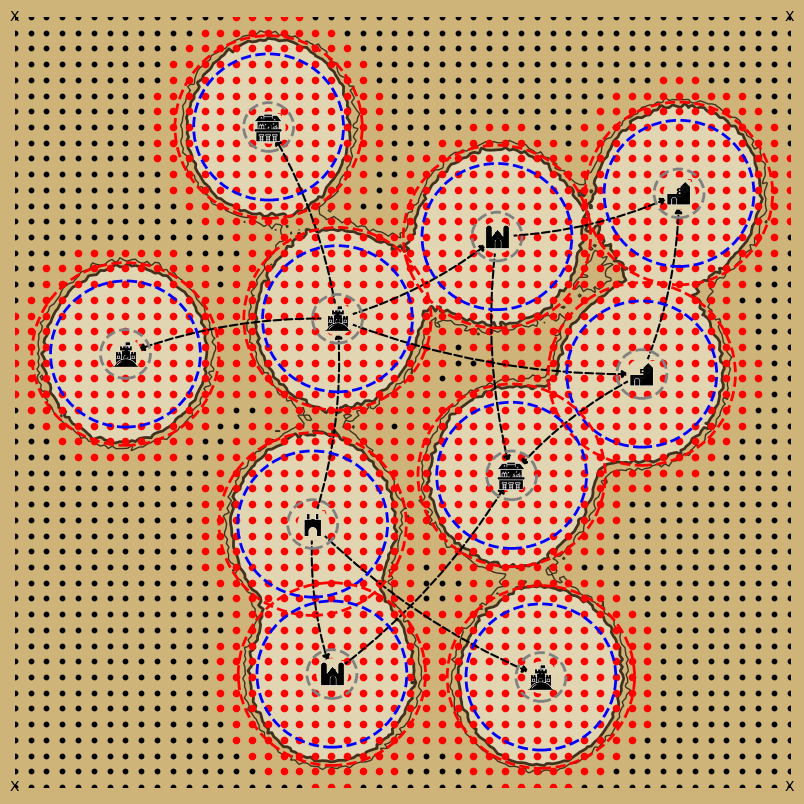

In [8]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#ceb479')

ax.contourf(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1], contour_levels[10]],
    colors=["#e2d5b1"], 
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1]],
    colors="#41301e",
    linewidths=2
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1] * 0.7],
    colors="#41301e",
    linewidths=1
)

edges = nx.draw_networkx_edges(
    graph.getGraph(),
    layout,
    ax=ax,
    edge_color='black',
    width=1.5,
    style="dashed",
    connectionstyle="arc3,rad=0.1"
)

for edge in edges:
    edge.set_zorder(4)

nodes = nx.draw_networkx_nodes(
    graph.getGraph(),
    layout,
    ax=ax,
    node_color='#e2d5b1',
    node_size=500
)

nodes.set_zorder(5)

for node, (x, y) in layout.items():
    img_path = random.choice([
        {'path': 'images/treasure_map/constructions/house1.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house2.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house3.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house4.png', 'zoom': 0.16},
        {'path': 'images/treasure_map/constructions/house5.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house6.png', 'zoom': 0.13},
    ])
    
    processed_img = remove_white_pixels(img_path['path'])
    imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])

    ab = AnnotationBbox(
        imagebox, (x, y),
        frameon=False,
        xycoords='data',
        xybox=(0, 0),
        boxcoords="offset points"
    )
    ab.set_zorder(6)
    ax.add_artist(ab)

labels = nx.draw_networkx_labels(
    graph.getGraph(),
    layout,
    ax=ax,
    font_size=8,
    font_weight='bold',
    font_color="black"
)

for label in labels.values():
    label.set_zorder(6)

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)
ax.axis('off')

for node, (x, y) in layout.items():
    highlight_point = (x, y)
    
    # Add a circle around the point
    circle = Circle(
        highlight_point,
        radius=7.5,
        edgecolor="red",
        facecolor="none",  # Transparent circle
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)  # Ensure the circle is on top
    ax.add_patch(circle)
    
    circle = Circle(
        highlight_point,
        radius=2,
        edgecolor="gray",
        facecolor="none",  # Transparent circle
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)
    ax.add_patch(circle)

    circle = Circle(
        highlight_point,
        radius=6,
        edgecolor="blue",
        facecolor="none",
        linewidth=2,
        linestyle="--"
    )
    circle.set_zorder(7)
    ax.add_patch(circle)

    ax.annotate(
        node,
        xy=highlight_point,
        xytext=(highlight_point[0] + 0.5, highlight_point[1] + 0.5),
        arrowprops=dict(facecolor='red', arrowstyle="->"),
        fontsize=8,
        color="red"
    )

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

ax.text(
    x_min, y_min, 
    'X', 
    fontsize=10, 
    ha='center', 
    va='center', 
    color='black', 
    zorder=15
)

ax.text(
    x_min, y_max, 
    'X', 
    fontsize=10, 
    ha='center', 
    va='center', 
    color='black', 
    zorder=15
)

ax.text(
    x_max, y_min, 
    'X', 
    fontsize=10, 
    ha='center', 
    va='center', 
    color='black', 
    zorder=15
)

ax.text(
    x_max, y_max, 
    'X', 
    fontsize=10, 
    ha='center', 
    va='center', 
    color='black', 
    zorder=15
)

for point in grid_search(x_min, x_max, y_min, y_max, points=50):
    collision_detected = False
    
    for node, (x, y) in layout.items():
        distance = calculate_distance(point, (x, y))
        
        if distance <= collision_threshold:
            ax.scatter(point['x'], point['y'], color='red', s=20, zorder=3) 
            collision_detected = True 
            break
    
    if not collision_detected:
        ax.scatter(point['x'], point['y'], color='black', s=10, zorder=3)
    
plt.show()

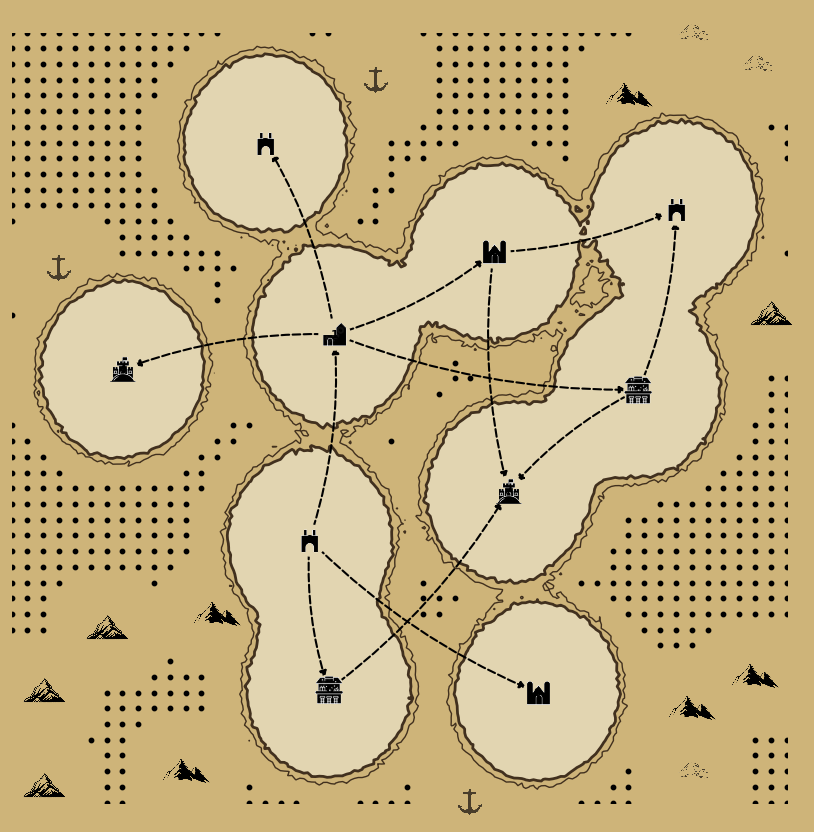

In [14]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#ceb479')

ax.contourf(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1], contour_levels[10]],
    colors=["#e2d5b1"], 
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1]],
    colors="#41301e",
    linewidths=2
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1] * 0.7],
    colors="#41301e",
    linewidths=1
)

edges = nx.draw_networkx_edges(
    graph.getGraph(),
    layout,
    ax=ax,
    edge_color='black',
    width=1.5,
    style="dashed",
    connectionstyle="arc3,rad=0.1"
)

for edge in edges:
    edge.set_zorder(4)

nodes = nx.draw_networkx_nodes(
    graph.getGraph(),
    layout,
    ax=ax,
    node_color='#e2d5b1',
    node_size=500
)

nodes.set_zorder(5)

for node, (x, y) in layout.items():
    img_path = random.choice([
        {'path': 'images/treasure_map/constructions/house1.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house2.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house3.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house4.png', 'zoom': 0.16},
        {'path': 'images/treasure_map/constructions/house5.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house6.png', 'zoom': 0.13},
    ])
    
    processed_img = remove_white_pixels(img_path['path'])
    imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])

    ab = AnnotationBbox(
        imagebox, (x, y),
        frameon=False,
        xycoords='data',
        xybox=(0, 0),
        boxcoords="offset points"
    )
    ab.set_zorder(6)
    ax.add_artist(ab)

labels = nx.draw_networkx_labels(
    graph.getGraph(),
    layout,
    ax=ax,
    font_size=8,
    font_weight='bold',
    font_color="black"
)

for label in labels.values():
    label.set_zorder(6)

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)
ax.axis('off')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
available_sea_prop_points = list()

collision_threshold = 9.5
for point in grid_search(x_min, x_max, y_min, y_max, points=50):
    collision_detected = False

    for node, (x, y) in layout.items():
        distance = calculate_distance(point, (x, y))

        if distance <= collision_threshold:
            collision_detected = True 
            break
    
    if not collision_detected:
        available_sea_prop_points.append((point['x'], point['y']))

collision_threshold = 5
for i in range(15):
    if available_sea_prop_points:
        collision_detected = True
        
        while collision_detected and available_sea_prop_points:
            selected_point = random.choice(available_sea_prop_points)
            selected_point = (selected_point[0], selected_point[1])
            collision_detected = False

            for node, (x, y) in layout.items():
                distance = calculate_distance({'x': selected_point[0], 'y': selected_point[1]}, (x, y))
                if distance <= collision_threshold:
                    collision_detected = True
                    break

            if not collision_detected:
                img_path = random.choice([
                    {'path': 'images/treasure_map/sea_props/prop_2.png', 'zoom': 0.04},
                    {'path': 'images/treasure_map/sea_props/prop_3.png', 'zoom': 0.05},
                    {'path': 'images/treasure_map/sea_props/prop_5.png', 'zoom': 0.05},
                    {'path': 'images/treasure_map/sea_props/prop_9.png', 'zoom': 0.08},
                    {'path': 'images/treasure_map/sea_props/prop_11.png', 'zoom': 0.08},
                ])
                
                processed_img = remove_white_pixels(img_path['path'])
                imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])
                
                ab = AnnotationBbox(
                    imagebox, (selected_point[0], selected_point[1]),
                    frameon=False,
                    xycoords='data',
                    xybox=(0, 0),
                    boxcoords="offset points"
                )
                ab.set_zorder(6)
                ax.add_artist(ab)
                
                available_sea_prop_points = [
                    point for point in available_sea_prop_points
                    if calculate_distance({'x': point[0], "y": point[1]}, selected_point) > collision_threshold
                ]
    else:
        print("No more available points left for placing images.")
        break

for point in available_sea_prop_points:
    ax.scatter(point[0], point[1], color='black', s=10, zorder=3)

plt.show()

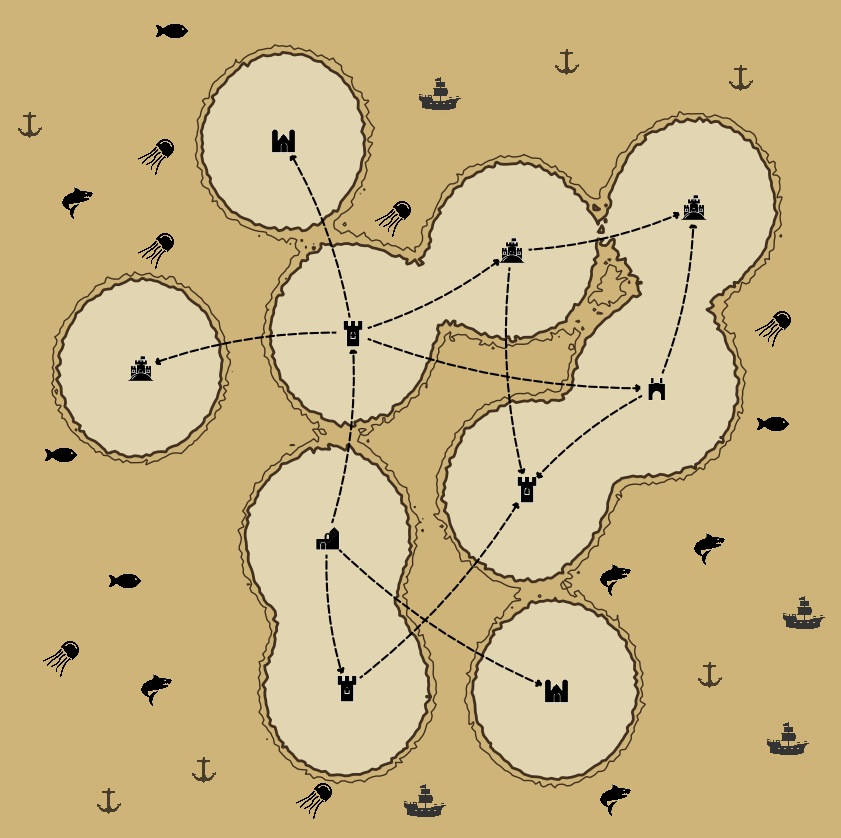

In [42]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#ceb479')

ax.contourf(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1], contour_levels[10]],
    colors=["#e2d5b1"], 
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1]],
    colors="#41301e",
    linewidths=2
)

ax.contour(
    x_grid,
    y_grid,
    density_with_noise,
    levels=[contour_levels[1] * 0.7],
    colors="#41301e",
    linewidths=1
)

edges = nx.draw_networkx_edges(
    graph.getGraph(),
    layout,
    ax=ax,
    edge_color='black',
    width=1.5,
    style="dashed",
    connectionstyle="arc3,rad=0.1"
)

for edge in edges:
    edge.set_zorder(4)

nodes = nx.draw_networkx_nodes(
    graph.getGraph(),
    layout,
    ax=ax,
    node_color='#e2d5b1',
    node_size=500
)

nodes.set_zorder(5)

for node, (x, y) in layout.items():
    img_path = random.choice([
        {'path': 'images/treasure_map/constructions/house1.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house2.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house3.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house4.png', 'zoom': 0.16},
        {'path': 'images/treasure_map/constructions/house5.png', 'zoom': 0.13},
        {'path': 'images/treasure_map/constructions/house6.png', 'zoom': 0.13},
    ])
    
    processed_img = remove_white_pixels(img_path['path'])
    imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])

    ab = AnnotationBbox(
        imagebox, (x, y),
        frameon=False,
        xycoords='data',
        xybox=(0, 0),
        boxcoords="offset points"
    )
    ab.set_zorder(6)
    ax.add_artist(ab)

labels = nx.draw_networkx_labels(
    graph.getGraph(),
    layout,
    ax=ax,
    font_size=8,
    font_weight='bold',
    font_color="black"
)

for label in labels.values():
    label.set_zorder(6)

ax.set_xlim(x_coords.min() - margin_factor * x_range, x_coords.max() + margin_factor * x_range)
ax.set_ylim(y_coords.min() - margin_factor * y_range, y_coords.max() + margin_factor * y_range)
ax.axis('off')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
available_sea_prop_points = list()

collision_threshold = 9.5
for point in grid_search(x_min, x_max, y_min, y_max, points=50):
    collision_detected = False

    for node, (x, y) in layout.items():
        distance = calculate_distance(point, (x, y))

        if distance <= collision_threshold:
            collision_detected = True 
            break
    
    if not collision_detected:
        available_sea_prop_points.append((point['x'], point['y']))

collision_threshold = 7
for i in range(25):
    if available_sea_prop_points:
        collision_detected = True
        
        while collision_detected and available_sea_prop_points:
            selected_point = random.choice(available_sea_prop_points)
            selected_point = (selected_point[0], selected_point[1])
            collision_detected = False

            for node, (x, y) in layout.items():
                distance = calculate_distance({'x': selected_point[0], 'y': selected_point[1]}, (x, y))
                if distance <= collision_threshold:
                    collision_detected = True
                    break

            if not collision_detected:
                img_path = random.choice([
                    {'path': 'images/treasure_map/sea_props/prop_2.png', 'zoom': 0.04},
                    {'path': 'images/treasure_map/sea_props/prop_5.png', 'zoom': 0.06},
                    {'path': 'images/treasure_map/sea_props/prop_13.png', 'zoom': 0.1},
                    {'path': 'images/treasure_map/sea_props/prop_15.png', 'zoom': 0.1},
                    {'path': 'images/treasure_map/sea_props/prop_16.png', 'zoom': 0.05},
                    {'path': 'images/treasure_map/sea_props/prop_17.png', 'zoom': 0.1},
                ])
                
                processed_img = remove_white_pixels(img_path['path'])
                imagebox = OffsetImage(processed_img, zoom = img_path['zoom'])
                
                ab = AnnotationBbox(
                    imagebox, (selected_point[0], selected_point[1]),
                    frameon=False,
                    xycoords='data',
                    xybox=(0, 0),
                    boxcoords="offset points"
                )
                ab.set_zorder(6)
                ax.add_artist(ab)
                
                available_sea_prop_points = [
                    point for point in available_sea_prop_points
                    if calculate_distance({'x': point[0], "y": point[1]}, selected_point) > collision_threshold
                ]
    else:
        print("No more available points left for placing images.")
        break

plt.savefig('first_iteration_map.png')
plt.show()